In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as font_manager
import matplotlib.patches as mpatches
import json
%matplotlib inline

In [3]:
# This might cause issues with your OS and installations of shapely, geos, and proj. 
# Try re-installing anaconda, and then previously mentioned dependencies. Then install cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Read the data

In [4]:
modal_profiles = pd.read_csv('./output/single_modal_profile.csv', index_col=0)

In [5]:
line_metadata =  pd.read_csv('./data/line_metadata.csv')
line_metadata = line_metadata.drop(columns='linenum')

In [6]:
# Load conversion guide
with open('./data/conversion_guide.json') as f:
  conversion_guide = json.load(f)

In [7]:
ea = pd.read_csv('./data/ea_cantomtericsmodalprofiles_socialstrain.csv', index_col=0, na_values='NaN', keep_default_na=True).dropna()

## Font Manager

In [8]:
import matplotlib.font_manager

weights = ['ultralight', 'light', 'normal', 'regular', 'book', 'medium', 
           'roman', 'semibold', 'demibold', 'demi', 'bold', 'heavy', 
           'extra bold', 'black']

print('weight'+6*' ', 'file name', '\n'+70*'-')
for weight in weights:
    fprops = matplotlib.font_manager.FontProperties(family='Roboto', 
                                                    weight=weight)
    print(weight+(12-len(weight))*' ', matplotlib.font_manager.findfont(fprops))

findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto'] not found. Falling

weight       file name 
----------------------------------------------------------------------
ultralight   /home/hideodaikoku/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf
light        /home/hideodaikoku/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf
normal       /home/hideodaikoku/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf
regular      /home/hideodaikoku/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf
book         /home/hideodaikoku/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf
medium       /home/hideodaikoku/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf
roman        /home/hideodaikoku/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf
semibold     /home/hideodaikoku/.local/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf
demi

# Plot the data

## New EA Data

In [16]:
modal_profiles = pd.read_csv('./data/cantometrics_ethnographicatlas.csv', index_col=0)
modal_profiles.head(5)

,soc_id,EA_code,line_3,line_10,line_21,line_23,line_37,Society_latitude,Society_longitude,Glottocode,...,glottocode_comment,line_12,std_subsistence,std_caste,std_slavery,std_class,std_EA033,std_EA031,musical_pc1,social_pc1
1,10000.0,NaN,0.416667,0.50,8192.0,0.00,0.75,-9.21,161.16,area1240,...,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,1.976583,NaN
2,10027.0,NaN,0.833333,0.50,128.0,0.00,0.75,0.22,34.82,luyi1234,...,NaN,0.50,NaN,NaN,NaN,NaN,NaN,NaN,0.866908,NaN
3,10033.0,Ie15,0.000000,0.50,1024.0,0.00,1.00,-4.33,143.25,ambu1247,...,NaN,0.75,0.375,0.0,0.0,0.00,0.2,NaN,0.968091,NaN
4,10055.0,Ci12,0.416667,0.50,128.0,0.00,0.25,44.32,39.98,abkh1244,...,NaN,0.50,0.625,0.0,0.5,1.00,0.4,0.500,-0.119211,-0.006381
5,10077.0,Ee1,0.416667,0.25,1024.0,0.75,0.50,27.63,94.35,bori1243,...,NaN,0.75,NaN,0.0,1.0,0.25,0.2,0.375,-0.690672,NaN


## Plot EA Data- Embellishment

/usr/local/lib/python3.8/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.8/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.


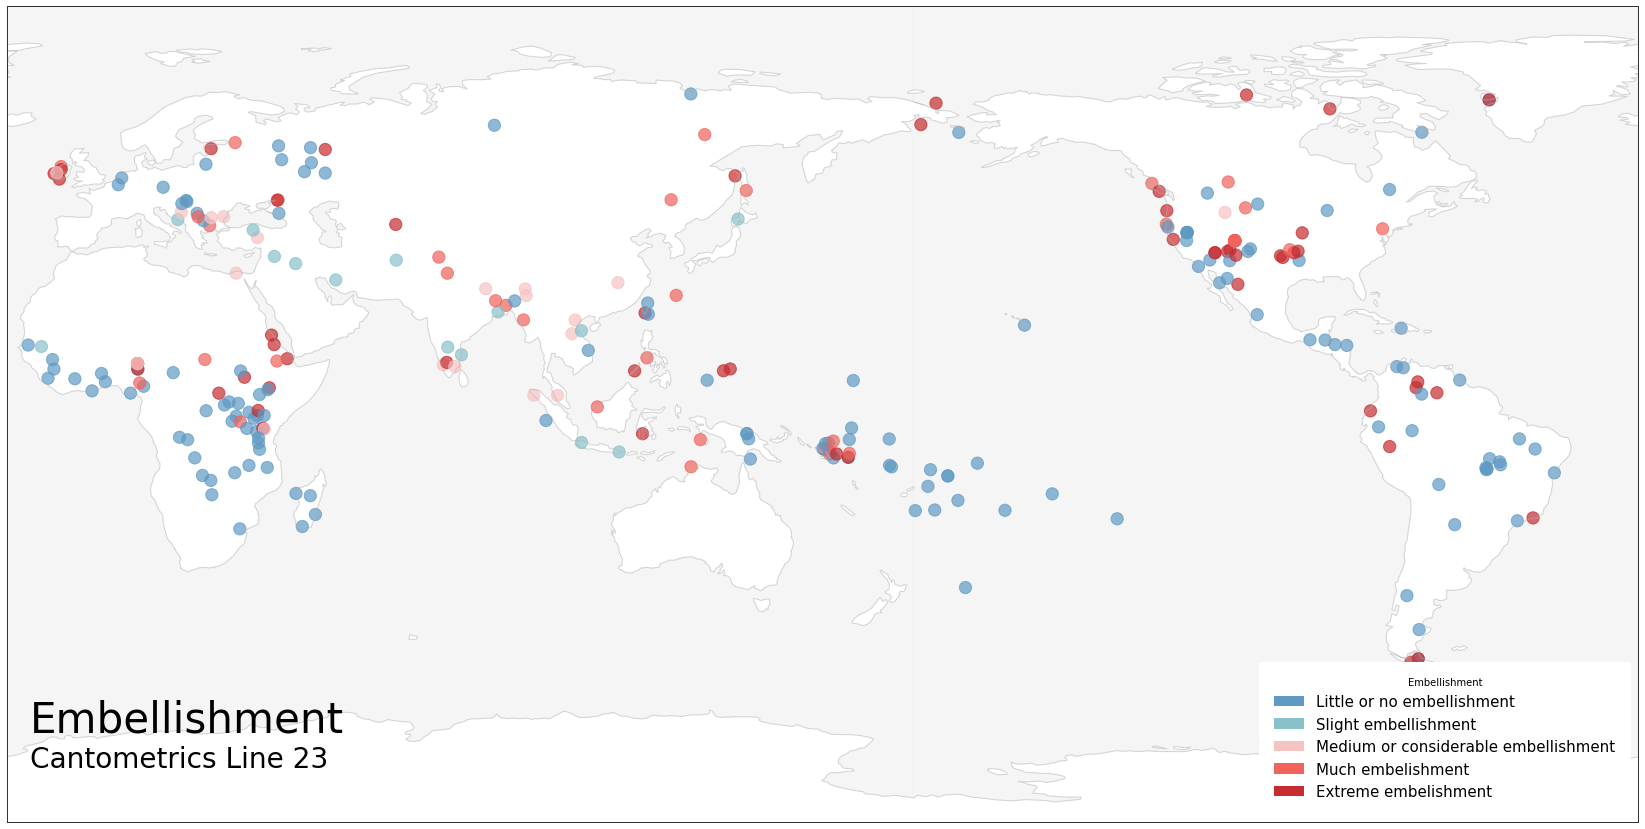

In [12]:
## Drop instances where there is no reading
embellishment = ea[ea.line_23 != 0]

## Map parameters
CENTRAL_LONGITUDE = 160.0
linenum = 23
vname = "Embellishment"
font_family = "Roboto"
alpha = 0.7

## output params
line_title = 'Cantometrics Line '+str(linenum)
column_name = 'line_'+str(linenum)
color_name = 'line'+str(linenum)+'_col'
color_map = {}
variable_name = vname
filename = './figs/'+vname.lower()+'_low.png'

## Project to co-ordinates
x,y = ([] for i in range(2))
for i, row in embellishment['Society_latitude'].iteritems():
    y.append(float(row))
for i, row in embellishment['Society_longitude'].iteritems():
    if float(row)+200 < 345:
        x.append(float(row)+200)
    else:
        x.append((float(row)+200)-345)
        
fig = plt.figure(figsize=(30,15))
projection=ccrs.PlateCarree(central_longitude=CENTRAL_LONGITUDE)
ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(alpha=.5, color="#B4B4B4")
ax.set_global()
ax.text(-175, -70, variable_name, fontsize=42, fontfamily=font_family, color="Black")
ax.text(-175, -78, line_title, fontsize=28, fontfamily=font_family, color="Black")

colors = list(ea.line23_col.unique())
order = [0, 4, 1, 3, 2]
colors = [colors[i] for i in order]

scatter = ax.scatter(x,  y,
           c=embellishment[color_name], 
           alpha=alpha,
           marker='o',
           sizes=(150,150))

label_names = ["Extreme embelishment", "Much embelishment", "Medium or considerable embellishment", 
               "Slight embellishment", "Little or no embellishment"]
label_names.reverse()
patch_1 = mpatches.Circle((0,0), radius=50, fc=colors[0], label=label_names[0])
patch_2 = mpatches.Circle((0,0), radius=50, fc=colors[1], label=label_names[1])
patch_3 = mpatches.Circle((0,0), radius=50, fc=colors[2], label=label_names[2])
patch_4 = mpatches.Circle((0,0), radius=50, fc=colors[3], label=label_names[3])
patch_5 = mpatches.Circle((0,0), radius=50, fc=colors[4], label=label_names[4])

plt.legend(handles=[patch_1, patch_2, patch_3, patch_4, patch_5],
                    loc="lower right", 
                    borderpad = 1,
                    framealpha = 1,
                    edgecolor ="none",
                    fontsize=15,
                    title='Embellishment')


ax.add_feature(cfeature.OCEAN, alpha=.6, color="#EFEFEF") 

plt.rcParams['legend.title_fontsize'] = 'x-large'
plt.rc('font',family=font_family, weight='regular')
plt.savefig(filename, bbox_inches = 'tight',pad_inches = 0)

## Plot EA Data - Stratification

In [13]:
ea.stratification_col.unique()

array(['#5E9AC4', '#F1635B', '#F6C3C3', '#C52B2F', '#88C1CA'],
      dtype=object)

findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.


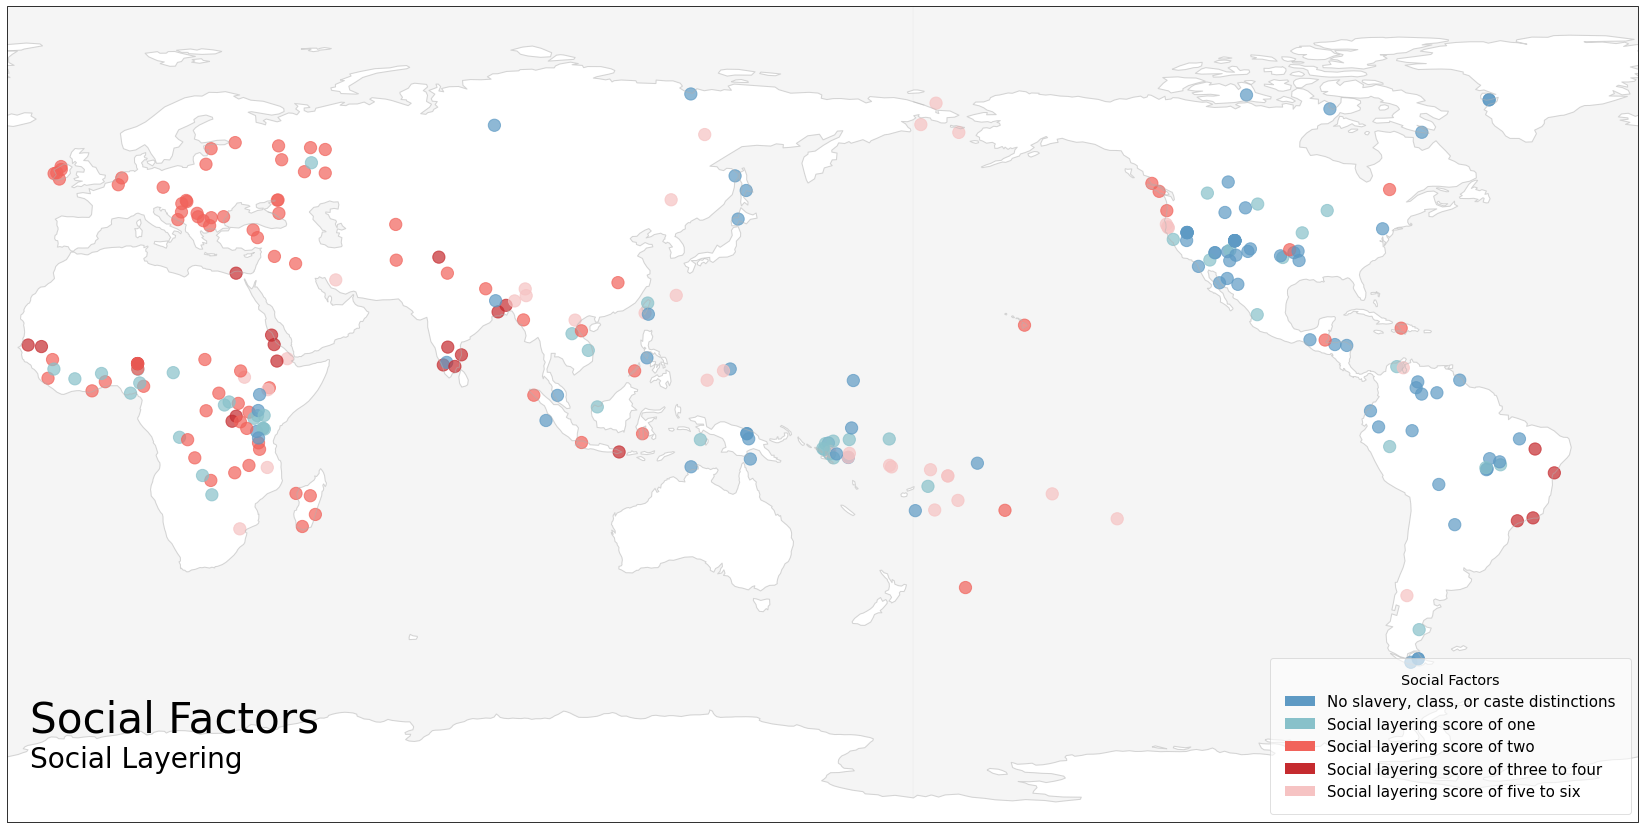

In [14]:
## Drop instances where there is no reading
stratification = ea

## Map parameters
CENTRAL_LONGITUDE = 160.0
vname = "Social Factors"


## output params
line_title = 'Social Layering'
# column_name = 'line_'+str(linenum)
color_name = 'stratification_col'
color_map = {}
variable_name = vname
filename = './figs/'+vname.lower().replace(" ", "_")+'_social_strain.png'
font_family = "Roboto"
weight =  'normal'
alpha = 0.7

## Project to co-ordinates
x,y = ([] for i in range(2))
for i, row in stratification['Society_latitude'].iteritems():
    y.append(float(row))
for i, row in stratification['Society_longitude'].iteritems():
    if float(row)+200 < 345:
        x.append(float(row)+200)
    else:
        x.append((float(row)+200)-345)
        
fig = plt.figure(figsize=(30,15))
projection=ccrs.PlateCarree(central_longitude=CENTRAL_LONGITUDE)
ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(alpha=.5, color="#B4B4B4")
ax.set_global()
ax.text(-175, -70, variable_name, fontsize=42, fontfamily=font_family, color="Black")
ax.text(-175, -78, line_title, fontsize=28, fontfamily=font_family, color="Black")

scatter = ax.scatter(x,  y,
           c=stratification[color_name], 
           alpha=alpha,
           marker='o',
           sizes = (150,150))

label_names = ['No slavery, class, or caste distinctions', 'Social layering score of one', 
               'Social layering score of two','Social layering score of three to four','Social layering score of five to six']

colors = list(ea.stratification_col.unique())
order = [0, 4, 1, 3, 2]
colors = [colors[i] for i in order]

patch_1 = mpatches.Circle((0,0), radius=50, fc=colors[0], label=label_names[0])
patch_2 = mpatches.Circle((0,0), radius=50, fc=colors[1], label=label_names[1])
patch_3 = mpatches.Circle((0,0), radius=50, fc=colors[2], label=label_names[2])
patch_4 = mpatches.Circle((0,0), radius=50, fc=colors[3], label=label_names[3])
patch_5 = mpatches.Circle((0,0), radius=50, fc=colors[4], label=label_names[4])

plt.legend(handles=[patch_1, patch_2, patch_3, patch_4, patch_5],
                    loc="lower right", 
                    borderpad = 1,
                    framealpha = 0.6,
                    fontsize=15,
                    title="Social Factors")


ax.add_feature(cfeature.OCEAN, alpha=.6, color="#EFEFEF") 

plt.rcParams['legend.title_fontsize'] = 'x-large'
plt.rc('font',family=font_family, weight=weight)
plt.savefig(filename, bbox_inches = 'tight',pad_inches = 0)

In [15]:
ea[['SocialFactors_V33_code','stratification_col']]

,SocialFactors_V33_code,stratification_col
3,1.0,#5E9AC4
4,4.0,#F1635B
5,3.0,#F6C3C3
8,1.0,#5E9AC4
9,3.0,#F6C3C3
...,...,...
1020,1.0,#5E9AC4
1021,1.0,#5E9AC4
1022,1.0,#5E9AC4
1023,5.0,#C52B2F
